In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [21]:
# 범주형 데이터 Sex를 숫자로 인코딩
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex']

id
0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int64

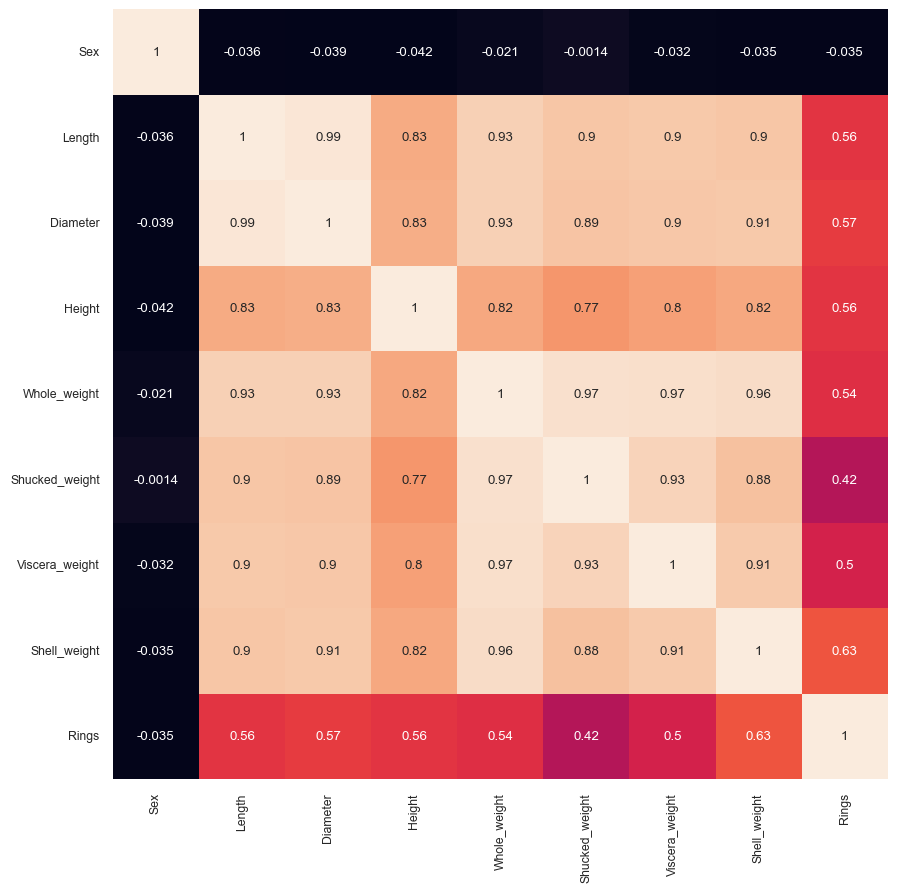

In [23]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

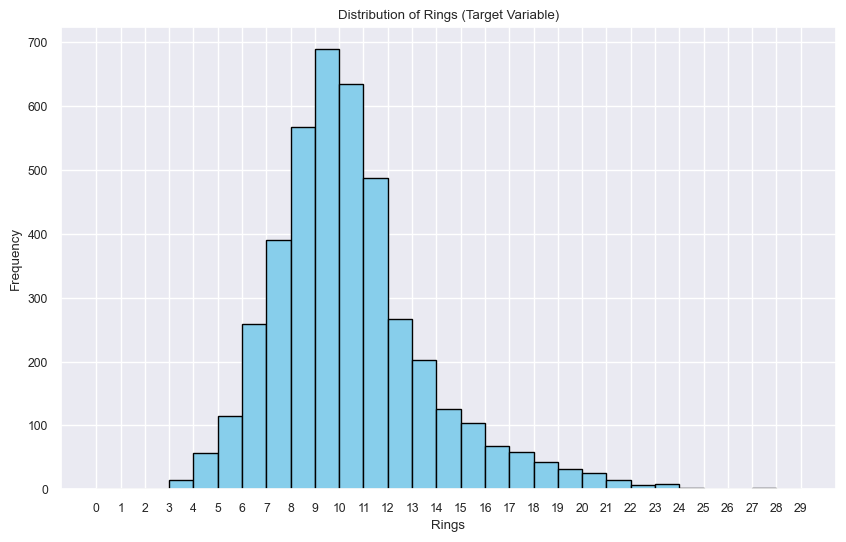

In [25]:
bins = np.arange(0, df['Rings'].max() + 1)

plt.figure(figsize=(10, 6))
plt.hist(df['Rings'], bins=bins, color='skyblue', edgecolor='black')
plt.xticks(bins)  # x축에 모든 구간 값 표시
plt.title('Distribution of Rings (Target Variable)')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
def categorize_rings(rings):
    if rings <= 8:
        return 0  # young
    elif 9 <= rings <= 10:
        return 1  # middle-aged
    else:
        return 2  # old

df['category'] = df['Rings'].apply(categorize_rings)

In [33]:
X = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']].values
y = df['category'].values

In [37]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [39]:
y

array([2, 0, 1, ..., 1, 1, 2])

In [41]:
y = to_categorical(y, 3)

In [43]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

2024-09-25 14:25:34.056838: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-09-25 14:25:34.056868: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-25 14:25:34.056875: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-25 14:25:34.057119: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-25 14:25:34.057142: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 6, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,899 (50.39 KB)

 Trainable params: 12,899 (50.39 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30


2024-09-25 14:25:49.043787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4649 - loss: 1.0163 - val_accuracy: 0.5598 - val_loss: 0.8506
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5728 - loss: 0.8726 - val_accuracy: 0.6077 - val_loss: 0.8211
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5914 - loss: 0.8634 - val_accuracy: 0.6077 - val_loss: 0.8035
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6227 - loss: 0.8096 - val_accuracy: 0.6160 - val_loss: 0.7946
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6431 - loss: 0.7984 - val_accuracy: 0.6232 - val_loss: 0.7873
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6232 - loss: 0.7989 - val_accuracy: 0.6089 - val_loss: 0.7825
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6275 - loss: 0.8238 - val_accuracy: 0.6208 - val_loss: 0.7772
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6449 - loss: 0.8056 - val_accuracy: 0.624

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6629 - loss: 0.7095
Test Loss: 0.75
Test Accuracy: 0.63


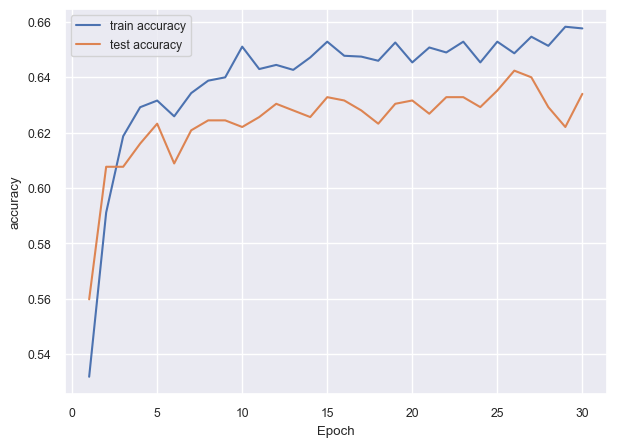

In [63]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

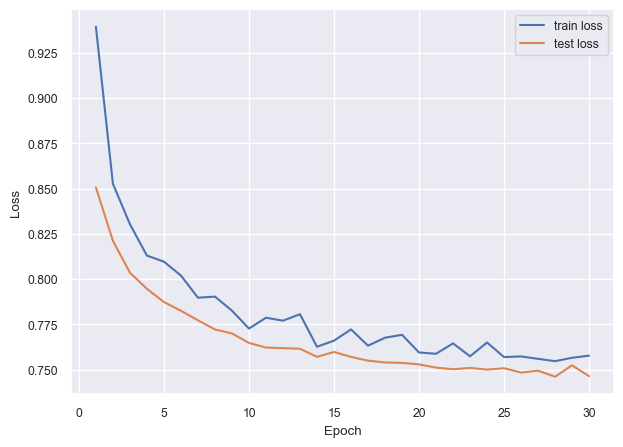

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# L2 정규화

In [68]:
from keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4321 - loss: 2.1805 - val_accuracy: 0.5359 - val_loss: 1.5952
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5683 - loss: 1.5040 - val_accuracy: 0.5526 - val_loss: 1.2598
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5737 - loss: 1.2411 - val_accuracy: 0.5562 - val_loss: 1.0981
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5774 - loss: 1.0971 - val_accuracy: 0.5550 - val_loss: 1.0158
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5511 - loss: 1.0212 - val_accuracy: 0.5538 - val_loss: 0.9712
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5635 - loss: 0.9759 - val_accuracy: 0.5502 - val_loss: 0.9462
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5804 - loss: 0.9403 - val_accuracy: 0.5574 - val_loss: 0.9279
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5632 - loss: 0.9549 - val_accu

In [72]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5766 - loss: 0.8721
Test Loss: 0.88
Test Accuracy: 0.56


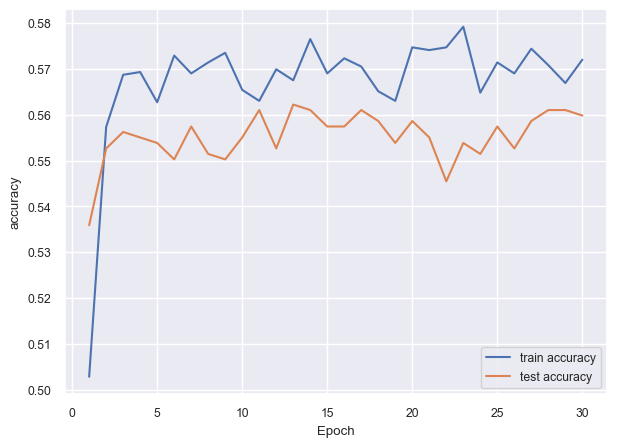

In [74]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

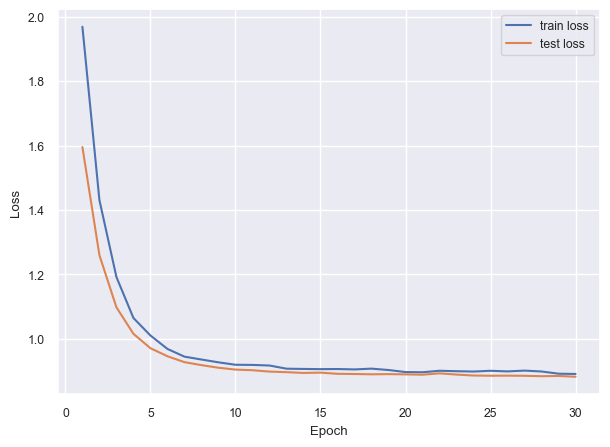

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy의 변동성 증가와 수치가 떨어짐

# L2 강도 조정

In [80]:
from keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4753 - loss: 1.7954 - val_accuracy: 0.5383 - val_loss: 1.3533
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5696 - loss: 1.3060 - val_accuracy: 0.5622 - val_loss: 1.1302
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5564 - loss: 1.1190 - val_accuracy: 0.5562 - val_loss: 1.0243
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5624 - loss: 1.0250 - val_accuracy: 0.5610 - val_loss: 0.9690
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5703 - loss: 0.9694 - val_accuracy: 0.5610 - val_loss: 0.9407
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5627 - loss: 0.9595 - val_accuracy: 0.5598 - val_loss: 0.9193
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5663 - loss: 0.9352 - val_accuracy: 0.5670 - val_loss: 0.9087
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5708 - loss: 0.9242 - val_accu

In [84]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6372 - loss: 0.8182
Test Loss: 0.84
Test Accuracy: 0.62


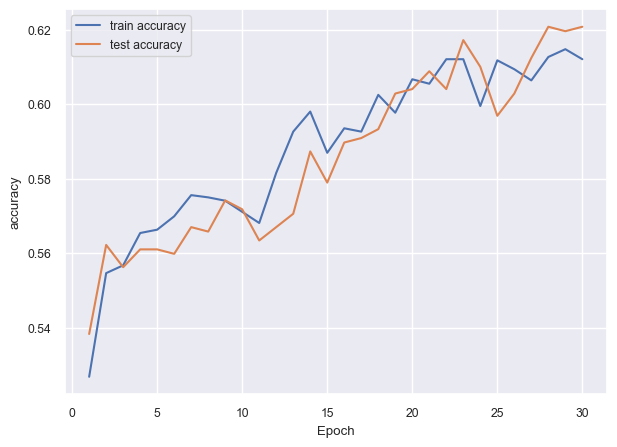

In [86]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

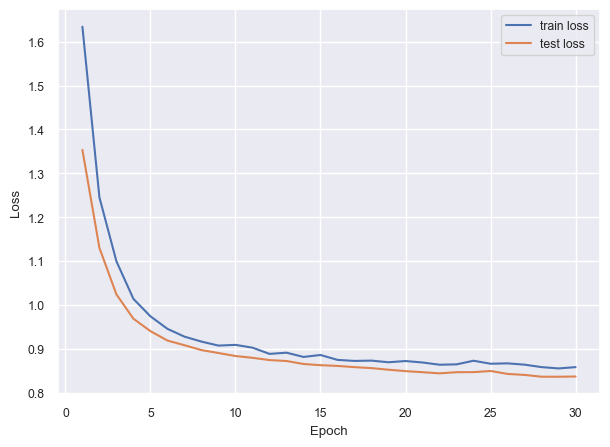

In [88]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Dropout 비율 조절

In [91]:
from keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Dropout(0.1),
    Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Dropout(0.1),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5333 - loss: 1.7325 - val_accuracy: 0.5455 - val_loss: 1.3178
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5629 - loss: 1.2583 - val_accuracy: 0.5562 - val_loss: 1.0976
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5801 - loss: 1.0922 - val_accuracy: 0.5670 - val_loss: 0.9967
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5733 - loss: 0.9937 - val_accuracy: 0.5610 - val_loss: 0.9496
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5682 - loss: 0.9523 - val_accuracy: 0.5706 - val_loss: 0.9189
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5707 - loss: 0.9330 - val_accuracy: 0.5742 - val_loss: 0.9008
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5947 - loss: 0.8976 - val_accuracy: 0.5921 - val_loss: 0.8884
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5952 - loss: 0.8856 - val_accu

In [93]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6453 - loss: 0.8060
Test Loss: 0.82
Test Accuracy: 0.62


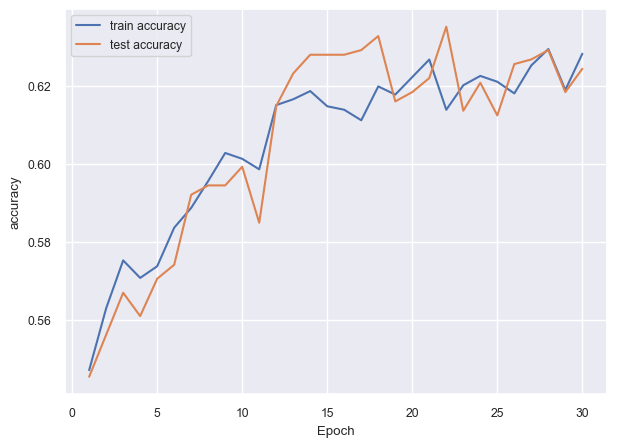

In [95]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

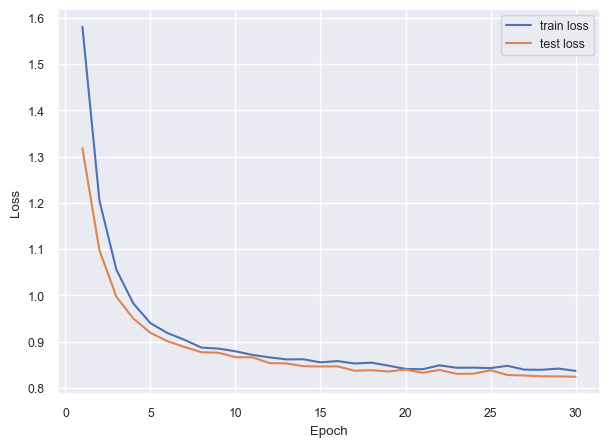

In [97]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Learning Rate 조절

In [101]:
from keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Dropout(0.1),
    Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Dropout(0.1),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5463 - loss: 1.6178 - val_accuracy: 0.5502 - val_loss: 1.0897
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5450 - loss: 1.0685 - val_accuracy: 0.5634 - val_loss: 0.9474
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5666 - loss: 0.9400 - val_accuracy: 0.5622 - val_loss: 0.9143
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5781 - loss: 0.9235 - val_accuracy: 0.5682 - val_loss: 0.8918
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5819 - loss: 0.8889 - val_accuracy: 0.5467 - val_loss: 0.8828
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5859 - loss: 0.8745 - val_accuracy: 0.5610 - val_loss: 0.8726
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5681 - loss: 0.8978 - val_accuracy: 0.5754 - val_loss: 0.8678
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5706 - loss: 0.8924 - val_accu

In [103]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6435 - loss: 0.7850
Test Loss: 0.82
Test Accuracy: 0.62


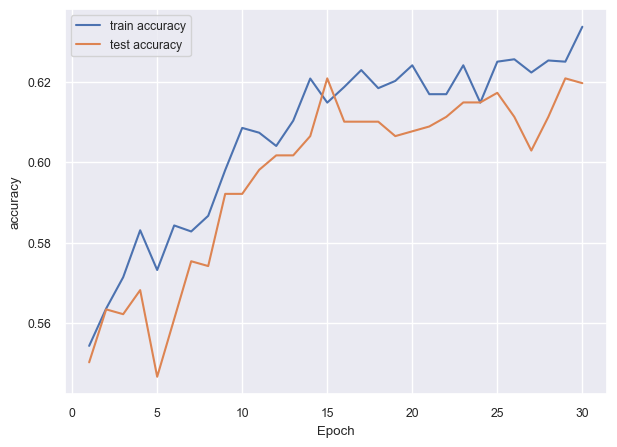

In [107]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

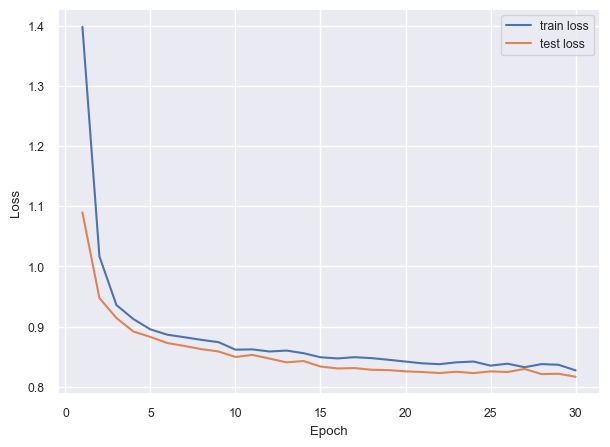

In [105]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [110]:
from sklearn.model_selection import KFold

X_scaled = np.expand_dims(X_scaled, axis=2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def create_model():
    model = Sequential([
        Input(shape=(X_train.shape[1], 1)),
        Conv1D(filters=32, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling1D(pool_size=2),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling1D(pool_size=2),
        Dropout(0.1),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [112]:
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 모델 생성
    model = create_model()

    # 모델 학습
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # 모델 평가
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold_no} - Loss: {scores[0]} - Accuracy: {scores[1]}")
    
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    fold_no += 1


Fold 1 - Loss: 0.8187769055366516 - Accuracy: 0.6076555252075195
Fold 2 - Loss: 0.8318267464637756 - Accuracy: 0.6315789222717285
Fold 3 - Loss: 0.7916579246520996 - Accuracy: 0.6479042172431946
Fold 4 - Loss: 0.8560787439346313 - Accuracy: 0.6227545142173767
Fold 5 - Loss: 0.8565692901611328 - Accuracy: 0.6083832383155823


In [113]:
# 교차 검증 결과 출력
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f"> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}")
print('------------------------------------------------------------------------')
print(f"Average scores for all folds:")
print(f"> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})")
print(f"> Loss: {np.mean(loss_per_fold)}")
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
> Fold 1 - Loss: 0.8187769055366516 - Accuracy: 0.6076555252075195
> Fold 2 - Loss: 0.8318267464637756 - Accuracy: 0.6315789222717285
> Fold 3 - Loss: 0.7916579246520996 - Accuracy: 0.6479042172431946
> Fold 4 - Loss: 0.8560787439346313 - Accuracy: 0.6227545142173767
> Fold 5 - Loss: 0.8565692901611328 - Accuracy: 0.6083832383155823
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.6236552834510803 (+- 0.015105190193439418)
> Loss: 0.8309819221496582
------------------------------------------------------------------------
